# Describe:

## Load the Boston housing dataset.

The data was collected in 1978 and  originates from the UCI Machine Learning Repository. Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [7]:
#import and print out dataset and credits.
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())

print(boston.data.shape)

print(boston.feature_names)

print(boston.DESCR)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

# Descriptive Statistics and Plots.
the data can be broken down into sections:
1. Displaying the dataset in table format.
2. Removing all null values.
3. Finding the mean, SD, min and max numbers in each column and Displaying stats using plots.
4. Finding the mean, SD, Max and min for the house prices within the dataset and displaying using plots.

### Displaying the data in table format.
After pulling in the dataset we now need to display it in a readable style. There are many lines within this code which would take up much space, for the purpose of this project the author will call the first 5 at the top and bottom of the table. Utilising pandas,  the method pd.DataFrame()  pass boston.data, the first and last five data lines are displayed using head() and tail()functions, the numbers of lines len() are also displayed, so the user is aware of the expance of the data.

In [10]:
#to get the line lengths
print("The number of lines in the dataset are:" )
len(bos)

The number of lines in the dataset are:


506

In [15]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.datasets import load_boston
boston = load_boston()

#complie data to give correct headings and place on readable table.
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
#complie data to give correct headings and place on readable table.
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.tail()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


### Removing all null values.

Many datasets will have some amount of data missing, this is rectified by utilising Pandas to clean the data by elimiating any missing data. Pandas automatically sets as NaN values. These are identified by running df.isnull() , which returns a Boolean DataFrame. To get the number of NaN's per column, run df.isnull().sum(). 


In [11]:
#clean the data find the null values and display.

bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### To simplify the analysis, remove some of the columns. 
  #### If you wish to remove some columns by running the cell that contains the following code:

In [12]:
#for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
     #del bos[col]

### Finding the mean, SD, min and max numbers in each column and Displaying stats using plots.

This computes the mean, standard deviation, minimum, and maximum properties for each column. This table gives an idea of how everything is distributed. for asthetic reasons the author employed the use of { .T }to the output; this swaps the rows and columns displaying the names along the side. 

In [91]:
bos['PRICE'] = boston.target
bos.head()
bos.describe().T




,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Finding the mean, SD, Max and min for the house prices within the dataset and displaying using plots.
Displaying the minimum, maximum, mean, median, and standard deviation of median value owner occupied homes in $1000's 'MEDV', which is stored in prices.
Each calculation is stored in their respective variable.


Boston housing dataset has 489 data points with 4 variables each.

Statistics for Boston housing dataset Prices:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


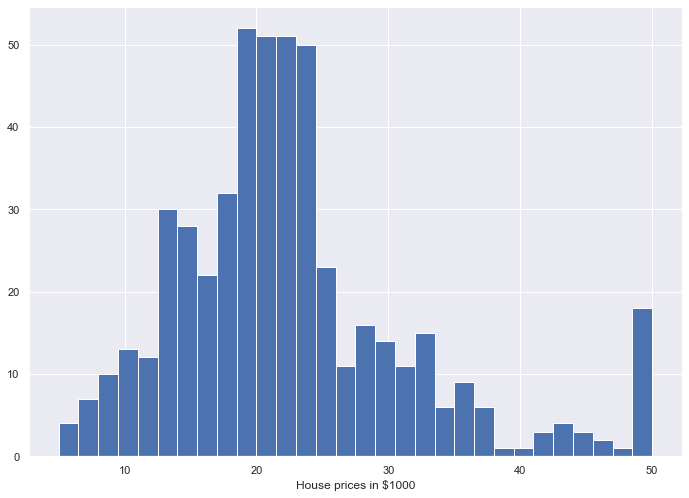

In [70]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import sklearn training and testing data splitter
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals_md as vs
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline
sns.set_style("whitegrid")

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("\nStatistics for Boston housing dataset Prices:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Above the author has used  visualizations to understand the median value of all the homes with other features.
The distribution of the target variable using the histogram plot function from the matplotlib library.
We can see from the plot that the values of MEDV are distributed normally with few outliers. 

# Infer:

create scatter plots to represent the data in pictorial form.

(339, 14)
(167, 14)
(339,)
(167,)


Text(0.5, 1.0, 'Prices vs Predicted prices:')

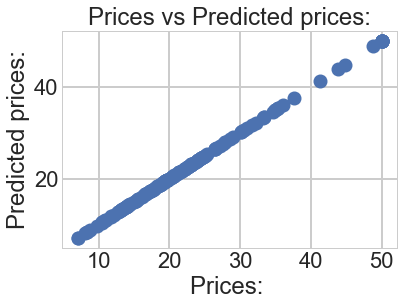

In [94]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.model_selection

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: ")
plt.ylabel("Predicted prices:")
plt.title("Prices vs Predicted prices:")


Using three features from the Boston housing dataset: 
###### 'RM': is the average number of rooms among homes in the neighborhood.
###### 'LSTAT': is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
###### 'PTRATIO': is the ratio of students to teachers in primary and secondary schools in the neighborhood.
For each data point (neighborhood):

##### RM
For a higher RM,  there is a higher MEDV.
This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

##### LSTAT
For a higher LSTAT,there is a lower MEDV.
The area dominated by "lower class" citizens  may be deemed  unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would have lower home demand, hence lower prices.

##### PTRATIO
For a higher LSTAT, one would expect to observe a lower MEDV.
This is because there would be a higher student to teacher ratio resulting in less attention dedicated to each student that may impair their performance in school. Prices of houses around public schools where there is a high student to teacher ratio are generally lower than those with the opposite. Therefore expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

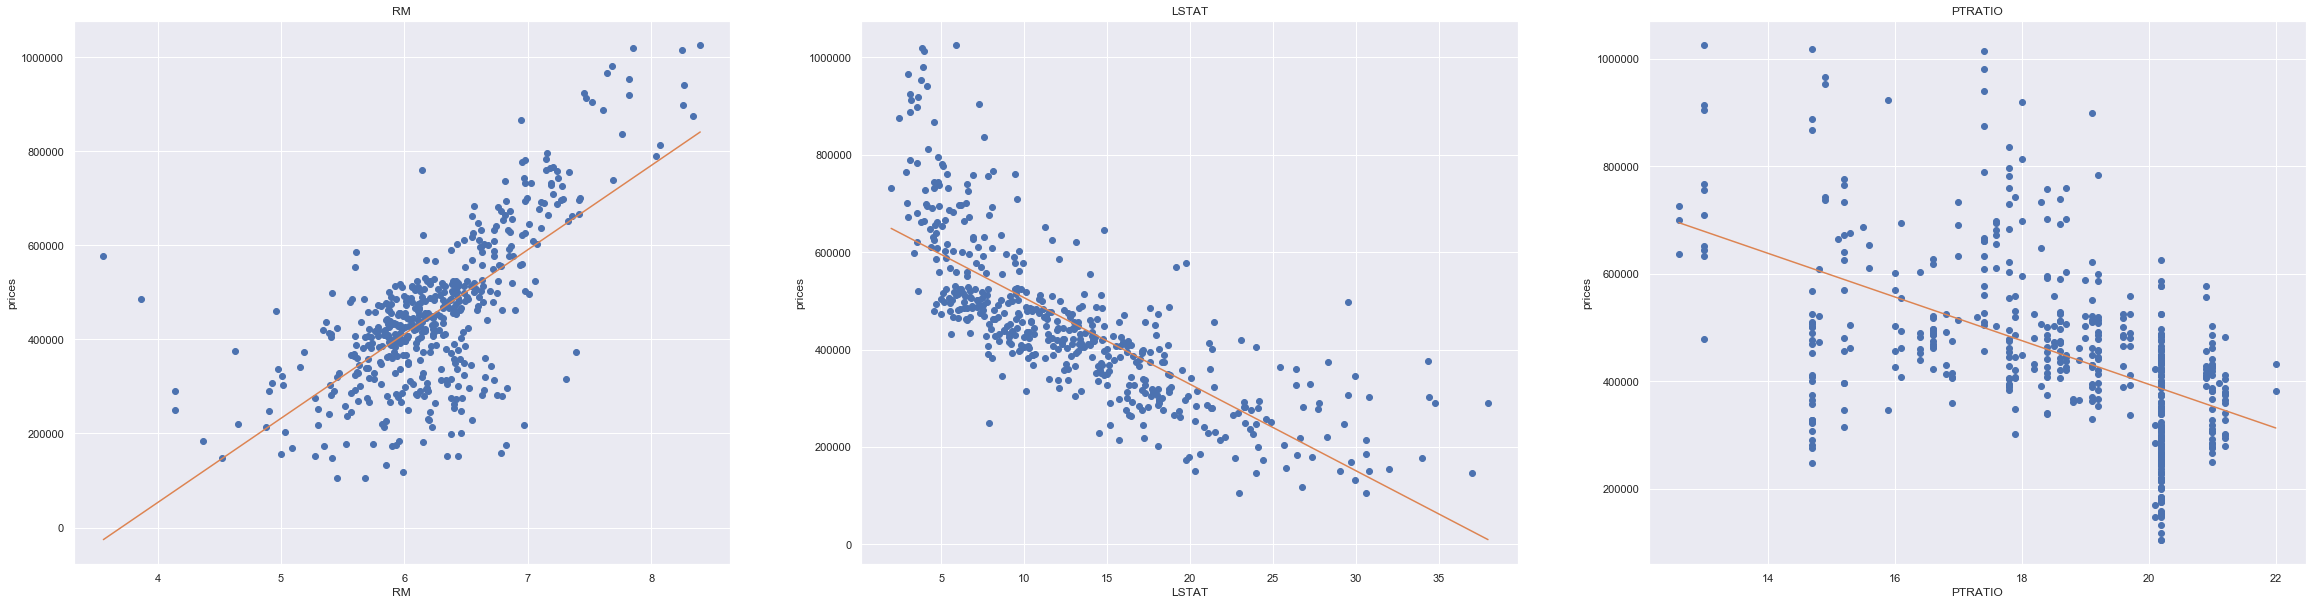

In [92]:
# Using pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

plt.figure(figsize=(40, 10))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

# -----------------------------------------------------------------------------------------------------

# Analyse whether there is a significant difference in median house prices between those on the charles river and those not.

room number, tax-full value tax property rate per $10000, dis distance from employment centers and indus-non retail business acres.

Correlation
Finding correlation between attributes is a useful way to check for patterns in the dataset. Pandas offers three different ways to find correlation between attributes (columns). The output of each of these correlation functions fall within the range [-1, 1].

1 - Positively correlated
-1 - Negatively correlated.
0 - Not correlated.
We will use df.corr() function to compute the correlation between attributes and sns.heatmap() function to visualize the correlation matrix.

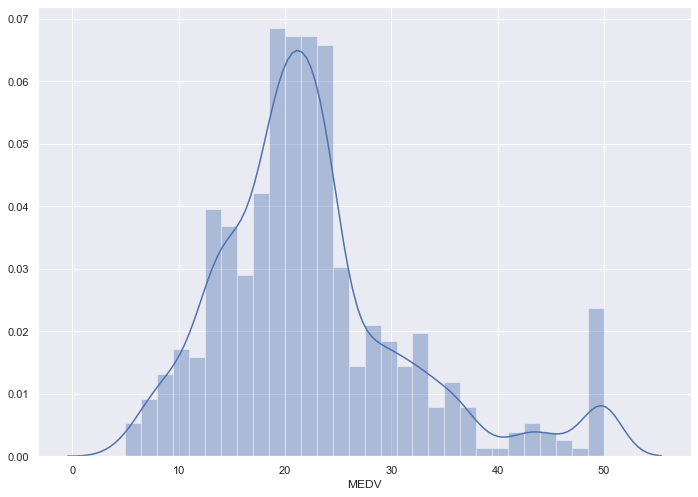

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins=30)
plt.show()

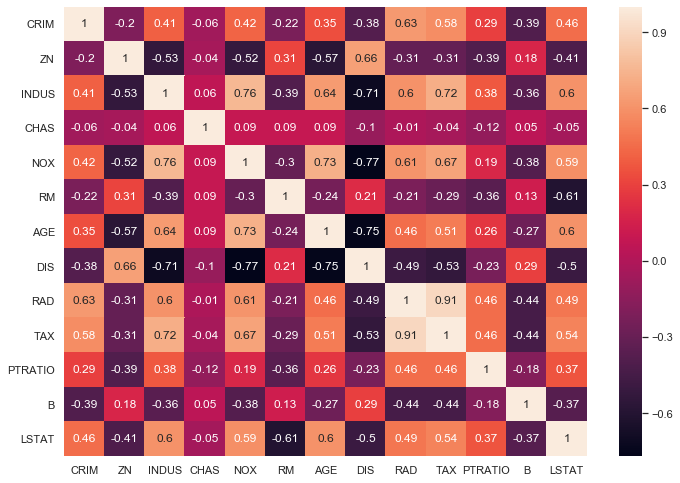

In [45]:
import pandas as pd
correlation_matrix = bos_1.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. Observations: To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74). An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75. Based on the above observations we will RM and LSTAT as our features.

The question was posed, 'Was there a significantdifference in house prices between house prices along the charle River and those not'? 
In the authors opinion, there is a sigificant difference in house prices between the two. Using the heamap and survaying the various lines along the grid, the nearest corrolation with 'CHAS' is 'PRICE' AND 'MEDV' BOTH AT (0.2), while it is on the positive and indicate a correlation, it doesn't indicate a strong correlation with the variable. On the oposite side are 'LSTAT','PTRATIO' AND 'DIS', (-0.1)the latter indicate a lower 'ststus' of population, where house prices are presumable less expensive due to the populations ecconomic circumstance, higher teacher pupil ratio and distance from an employment center.


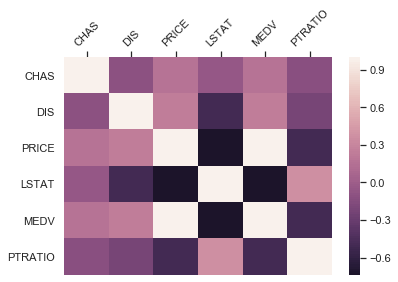

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
cols = ['CHAS','DIS','PRICE', 'LSTAT', 'MEDV', 'PTRATIO'] 
bos[cols].head()
bos[cols].corr()


ax =sns.heatmap(bos[cols].corr(),cmap=sns.cubehelix_palette(100, light=0.10, dark=0.95))
ax.xaxis.tick_top() # move labels to the top

for tick in ax.get_xticklabels():
     tick.set_rotation(45)
for tick in ax.get_yticklabels():
     tick.set_rotation(360)

In [172]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

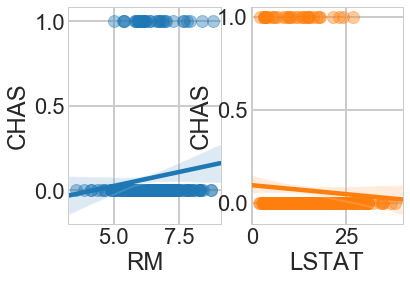

In [20]:
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'CHAS', bos, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'CHAS', bos, ax=ax[1],
scatter_kws={'alpha': 0.4}) 

Text(0, 0.5, '')

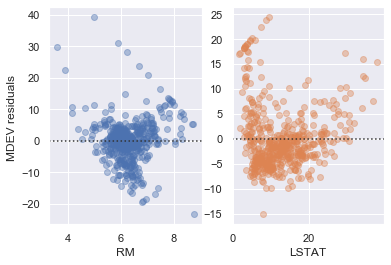

In [184]:
fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot('RM', 'MEDV', bos, ax=ax[0],
scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MDEV residuals ')
ax[1] = sns.residplot('LSTAT', 'MEDV', bos, ax=ax[1],
scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

In [173]:
# Import 'r2_score'
from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))



Model has a coefficient of determination, R^2, of 0.923.


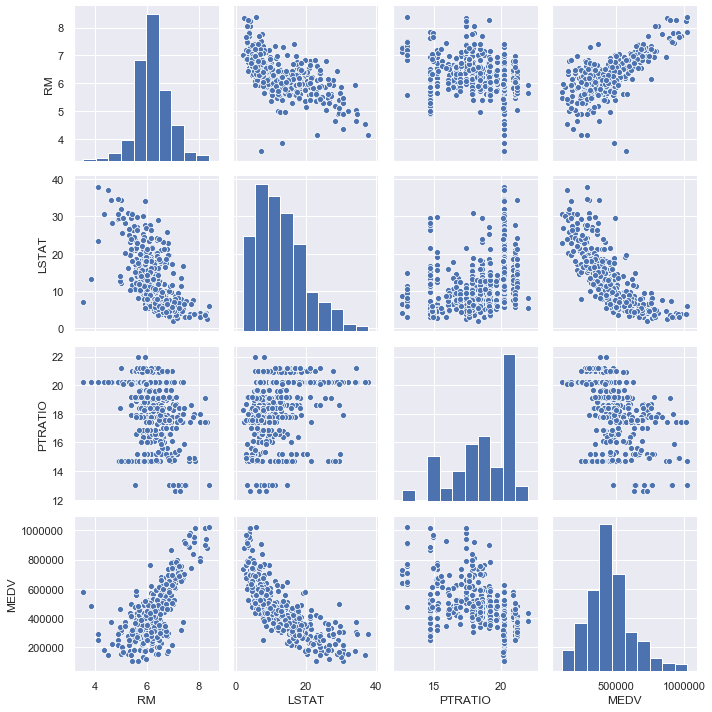

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()
